# PROJECT 2 - MEDICAL COST INSURANCE BY SHIVANGI PAL (DS2306)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
insurance = pd.read_csv(r"C:\Users\hp\Downloads\dataset4-main (2)\dataset4-main (1)\dataset4-main\medical_cost_insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.notnull()

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,True,True,True
1334,True,True,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hp\AppData\Local\Temp\ipykernel_3036\3172023160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


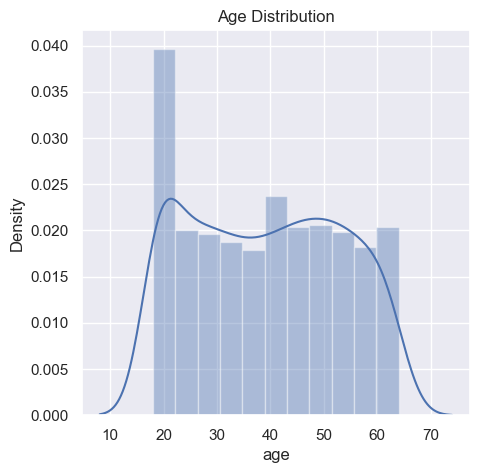

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

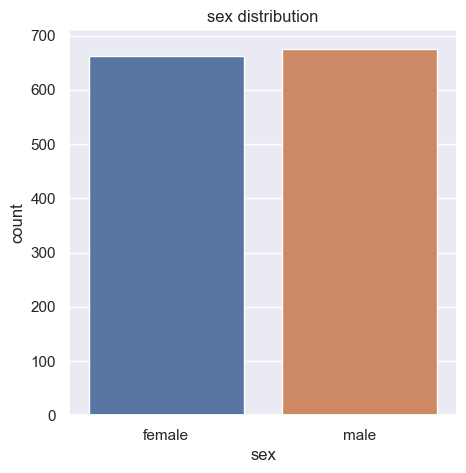

In [11]:
# sex
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance)
plt.title('sex distribution')
plt.show()

In [12]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
# BMI distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_3036\1743174404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


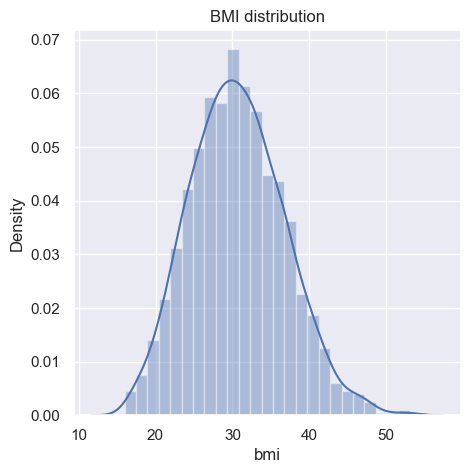

In [15]:
plt.figure(figsize=(5,5))
sns.distplot(insurance['bmi'])
plt.title('BMI distribution')
plt.show()

In [16]:
# children column

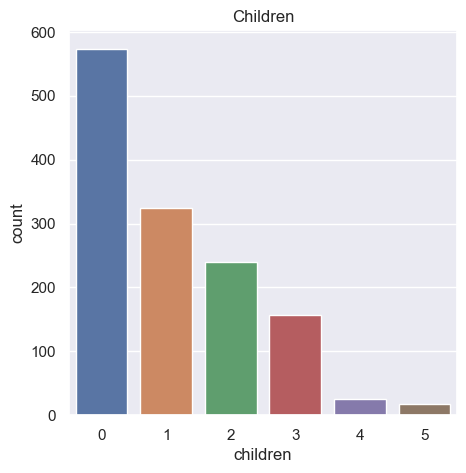

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance)
plt.title("Children")
plt.show()

In [18]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

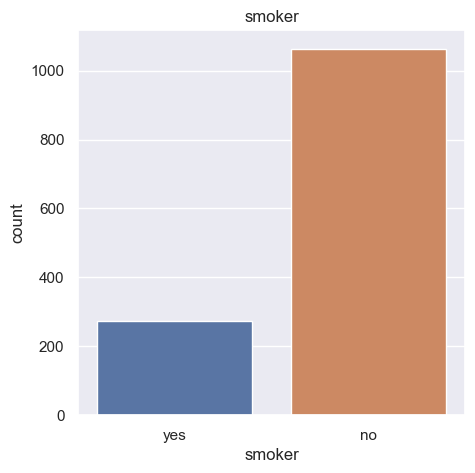

In [19]:
# smoker
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance)
plt.title("smoker")
plt.show()

In [21]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

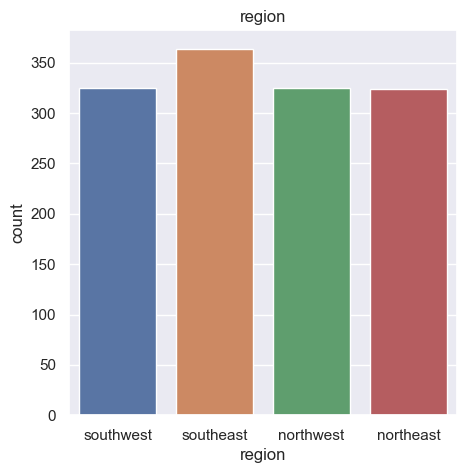

In [22]:
# region
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance)
plt.title("region")
plt.show()

In [23]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_3036\1079589123.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


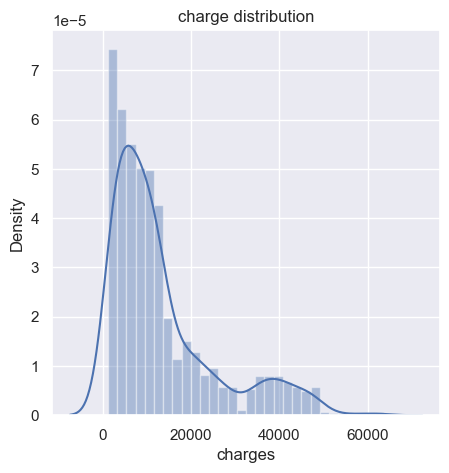

In [24]:
# distribution of charges value
plt.figure(figsize=(5,5))
sns.distplot(insurance['charges'])
plt.title("charge distribution")
plt.show()

In [31]:
# encoding sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker column
insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
 
#encoding region column
insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

In [32]:
X = insurance.drop(columns='charges' , axis=1)
Y = insurance['charges']

In [34]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [35]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [38]:
# loading the linear regression model

In [40]:
regressor = LinearRegression()

In [41]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [42]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [46]:
# R squared value
r2_train=metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ' ,r2_train)

R squared value :  0.751505643411174


In [47]:
# prediction on test data
test_data_prediction=regressor.predict(X_test)

In [49]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale :',r2_test)

R squared vale : 0.7447273869684076


In [52]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496048


C:\Users\hp\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
